# Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, ConfusionMatrixDisplay
)

# Load and clean dataset

In [14]:
df = pd.read_excel("wmr2024_annex_4f.xlsx", sheet_name='Annex4F_allyears', skiprows=2)
df.columns = ['Country', 'Year', 'Population', 'Cases_Lower', 'Cases_Point', 'Cases_Upper',
              'Deaths_Lower', 'Deaths_Point', 'Deaths_Upper']
df['Country'] = df['Country'].ffill()
df = df.dropna(subset=['Year', 'Cases_Point'])
df['Year'] = df['Year'].astype(int)
df['Population'] = df['Population'].astype(float)
df['Cases_Point'] = df['Cases_Point'].astype(float)
df.head()

,Country,Year,Population,Cases_Lower,Cases_Point,Cases_Upper,Deaths_Lower,Deaths_Point,Deaths_Upper
0,"Algeria1,2,3",2000,1815294.0,-,34.0,-,-,2.0,-
1,"Algeria1,2,3",2001,1840395.0,-,6.0,-,-,1.0,-
2,"Algeria1,2,3",2002,1865044.0,-,10.0,-,-,0.0,-
3,"Algeria1,2,3",2003,1890007.0,-,5.0,-,-,0.0,-
4,"Algeria1,2,3",2004,1916585.0,-,2.0,-,-,0.0,-


# Regression model setup

**1. Split the data into training and testing sets (for regression)**

In [22]:
X_reg = df[['Year', 'Population']]
y_reg = df['Cases_Point']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

**2. Train the selected machine learning models (regression)**

In [23]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_reg, y_train_reg)

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(random_state=42)

In [18]:
# 🔮 Predict using regression models
y_pred_rf = rf.predict(X_test_reg)
y_pred_dt = dt.predict(X_test_reg)

**3. Evaluate model performance using appropriate metrics (regression)**

In [24]:
print("Random Forest Regression:")
print("R²:", r2_score(y_test_reg, y_pred_rf))
print("MSE:", mean_squared_error(y_test_reg, y_pred_rf))
print("MAE:", mean_absolute_error(y_test_reg, y_pred_rf))

print("\nDecision Tree Regression:")
print("R²:", r2_score(y_test_reg, y_pred_dt))
print("MSE:", mean_squared_error(y_test_reg, y_pred_dt))
print("MAE:", mean_absolute_error(y_test_reg, y_pred_dt))

Random Forest Regression:
R²: 0.7668155953348276
MSE: 188891497126836.06
MAE: 3404620.4303623186

Decision Tree Regression:
R²: 0.462106820325088
MSE: 435721454653024.06
MAE: 3817361.686594203


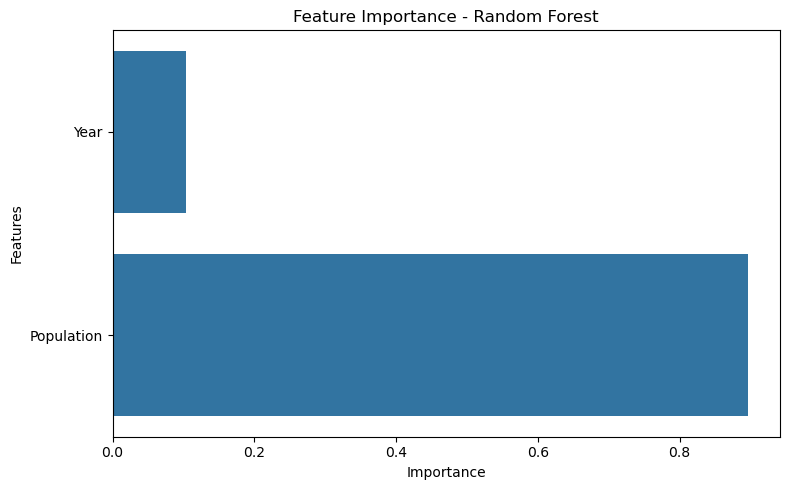

In [32]:
# Feature importance (extra visualization)
importances = rf.feature_importances_
features = X_reg.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Classification model setup

In [26]:
# Create label based on case counts
def label_risk(cases):
    if cases < 1000:
        return 'Low'
    elif cases < 10000:
        return 'Medium'
    else:
        return 'High'

df['Risk_Level'] = df['Cases_Point'].apply(label_risk)

**1. Split the data into training and testing sets (for classification)**

In [27]:
X_cls = df[['Year', 'Population']]
y_cls = df['Risk_Level']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

**2. Train the selected machine learning models (classification)**

In [28]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)

**3. Evaluate model performance using appropriate metrics (classification)**

In [29]:
print("Random Forest Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))  # includes Precision, Recall, F1, Accuracy

Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.78      0.79      0.78       362
         Low       0.52      0.47      0.49       139
      Medium       0.17      0.20      0.18        51

    accuracy                           0.65       552
   macro avg       0.49      0.48      0.48       552
weighted avg       0.66      0.65      0.65       552



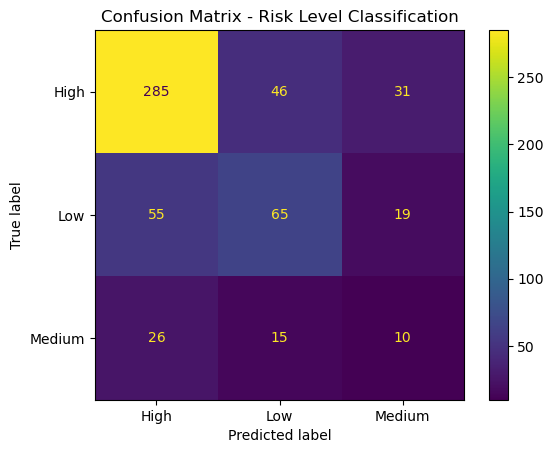

In [31]:
# Confusion matrix visualization 
ConfusionMatrixDisplay.from_estimator(clf, X_test_cls, y_test_cls)
plt.title("Confusion Matrix - Risk Level Classification")
plt.show()

In [33]:
# Export predictions to CSV for Tableau (optional but useful)
df_results = X_test_reg.copy()
df_results['Actual_Cases'] = y_test_reg.values
df_results['Predicted_Cases'] = y_pred_rf
df_results['Country'] = df.loc[X_test_reg.index, 'Country'].values
df_results['Year'] = df.loc[X_test_reg.index, 'Year'].values
df_results['Population'] = df.loc[X_test_reg.index, 'Population'].values
df_results['Risk_Level'] = y_pred_cls  # Index assumed to match
df_results.to_csv("malaria_predictions_for_tableau.csv", index=False)
print("Exported to malaria_predictions_for_tableau.csv")

Exported to malaria_predictions_for_tableau.csv
